In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

### **Data Preparation by creating transformation pipeline on the fly**
1. Creating Data transformation pipeline using transform Compose.
2. Basic transformation like padding, croping, rotation, fliping, normalizing and converting PLI image to tensor object.
3. Download data for pytorch datasets 

In [22]:
# Define transformations for the training set
transform_train = transforms.Compose([
    transforms.Pad(2),                                   # Pad images by 4 pixels
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),  # Random crop and resize
    transforms.RandomHorizontalFlip(),                   # Random horizontal flip
    transforms.ColorJitter(brightness=0.2, contrast=0.2), # Adjust brightness and contrast
    transforms.RandomRotation(15),                       # Random rotation by 15 degrees
    transforms.ToTensor(),                               # Convert to tensor
    transforms.Normalize((0.4914, 0.4822, 0.4465),       # Normalize with CIFAR-10 stats
                       (0.2470, 0.2435, 0.2616)),
    transforms.RandomErasing(p=0.5)                      # Random erasing
])

# Download and load the CIFAR-10 dataset
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

100%|██████████| 170M/170M [00:24<00:00, 7.08MB/s] 


Extracting ./data\cifar-10-python.tar.gz to ./data


## **Creating Custome CNN model**
1. Consists of 4 CNN layer.
2. Consists of 3 Activation function ReLU, Tanh and Sigmoid.
3. Perform Batch Normalization
4. And eventually perform Pooling operation to reduce the size of image.
5. Output of last CNN layer is flattern to 1D befor feeding it to fully connected dense layer.

In [26]:
# Step 3: Define the CNN architecture with customizable activation function
class CNN_CIFAR10(nn.Module):
    def __init__(self, activation_fn):
        super(CNN_CIFAR10, self).__init__()
        
        # Layer 1: Convolutional layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.activation = activation_fn
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        
        # Layer 2: Convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        
        # Layer 3: Convolutional layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        
        # Layer 4: Convolutional layer
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool4 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected layers
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 10)  # 10 classes for CIFAR-10
    
    def forward(self, x):
        # Layer 1
        x = self.pool1(self.activation(self.bn1(self.conv1(x))))
        # Layer 2
        x = self.pool2(self.activation(self.bn2(self.conv2(x))))
        # Layer 3
        x = self.activation(self.bn3(self.conv3(x)))
        # Layer 4
        x = self.pool4(self.activation(self.bn4(self.conv4(x))))
        # Fully connected layers
        x = self.flatten(x)
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

**Selecting Computing Resource based on the hardware use during Computation**

In [27]:
# Initialize device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [29]:
# # Step 5: Training loop for different activation functions
# activation_fns = {
#     "ReLU": nn.ReLU(),
#     "Tanh": nn.Tanh(),
#     "Sigmoid": nn.Sigmoid()
# }

# # Dictionary to store epoch times for each activation function
# epoch_times = {key: [] for key in activation_fns.keys()}

# # Train the model for each activation function
# for activation_name, activation_fn in activation_fns.items():
#     print(f"\nTraining with {activation_name} activation function...")
    
#     # Initialize model, loss function, and optimizer
#     model = CNN_CIFAR10(activation_fn).to(device)
#     criterion = nn.CrossEntropyLoss()
#     optimizer = optim.Adam(model.parameters(), lr=0.001)
    
#     # Training loop
#     training_error = 100.0  # Start with 100% error
#     epoch = 0
#     while training_error > 25.0:  # Stop when training error <= 25%
#         epoch += 1
#         start_time = time.time()
        
#         running_loss = 0.0
#         correct = 0
#         total = 0
        
#         for i, data in enumerate(trainloader, 0):
#             inputs, labels = data[0].to(device), data[1].to(device)
            
#             # Zero the parameter gradients
#             optimizer.zero_grad()
            
#             # Forward + backward + optimize
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
            
#             # Calculate accuracy
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
#             running_loss += loss.item()
        
#         # Calculate training error
#         training_error = 100 - (100 * correct / total)
#         epoch_time = time.time() - start_time
#         epoch_times[activation_name].append(epoch_time)
        
#         print(f'Epoch: {epoch}, Training Error: {training_error:.2f}%, Time: {epoch_time:.2f}s')

In [28]:
# # Step 6: Plot epoch times for all activation functions
# plt.figure(figsize=(10, 6))
# for activation_name, times in epoch_times.items():
#     plt.plot(range(1, len(times) + 1), times, label=activation_name)

# plt.xlabel('Epoch')
# plt.ylabel('Time (seconds)')
# plt.title('Time per Epoch for Different Activation Functions')
# plt.legend()
# plt.grid()
# plt.show()

with training error in epoch

In [ ]:
# Training loop for different activation functions
activation_fns = {
    "ReLU": nn.ReLU(),
    "Tanh": nn.Tanh(),
    "Sigmoid": nn.Sigmoid()
}

# Dictionary to store epoch times and errors for each activation function
epoch_times = {key: [] for key in activation_fns.keys()}
epoch_errors = {key: [] for key in activation_fns.keys()}

# Train the model for each activation function
for activation_name, activation_fn in activation_fns.items():
    print(f"\nTraining with {activation_name} activation function...")
    
    # Initialize model, loss function, and optimizer
    model = CNN_CIFAR10(activation_fn).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Training loop
    training_error = 100.0  # Start with 100% error
    epoch = 0
    while training_error > 45.0:  # Stop when training error <= 25%
        epoch += 1
        start_time = time.time()
        
        running_loss = 0.0
        correct = 0
        total = 0
        
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item()
        
        # Calculate training error
        training_error = 100 - (100 * correct / total)
        epoch_time = time.time() - start_time
        epoch_times[activation_name].append(epoch_time)
        epoch_errors[activation_name].append(training_error)
        
        print(f'Epoch: {epoch}, Training Error: {training_error:.2f}%, Time: {epoch_time:.2f}s')


Training with ReLU activation function...
Epoch: 1, Training Error: 55.32%, Time: 65.51s
Epoch: 2, Training Error: 41.30%, Time: 67.83s

Training with Tanh activation function...
Epoch: 1, Training Error: 56.92%, Time: 75.57s
Epoch: 2, Training Error: 45.06%, Time: 70.60s
Epoch: 3, Training Error: 39.75%, Time: 69.01s

Training with Sigmoid activation function...
Epoch: 1, Training Error: 70.20%, Time: 67.75s
Epoch: 2, Training Error: 58.65%, Time: 70.52s
Epoch: 3, Training Error: 53.60%, Time: 79.04s
Epoch: 4, Training Error: 49.95%, Time: 69.28s
Epoch: 5, Training Error: 47.02%, Time: 70.07s
Epoch: 6, Training Error: 44.18%, Time: 70.12s


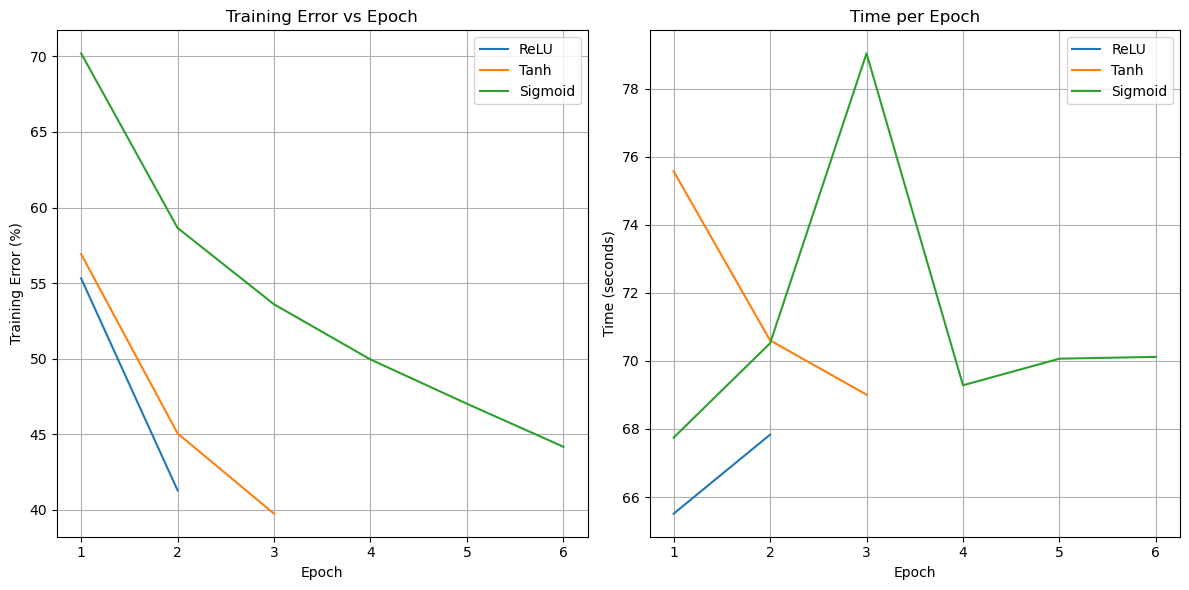

In [ ]:
# Step 6: Plot epoch times and training errors for all activation functions
plt.figure(figsize=(12, 6))

# Plot training error vs epoch
plt.subplot(1, 2, 1)
for activation_name, errors in epoch_errors.items():
    plt.plot(range(1, len(errors) + 1), errors, label=activation_name)

plt.xlabel('Epoch')
plt.ylabel('Training Error (%)')
plt.title('Training Error vs Epoch')
plt.legend()
plt.grid()

# Plot time vs epoch
plt.subplot(1, 2, 2)
for activation_name, times in epoch_times.items():
    plt.plot(range(1, len(times) + 1), times, label=activation_name)

plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.title('Time per Epoch')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

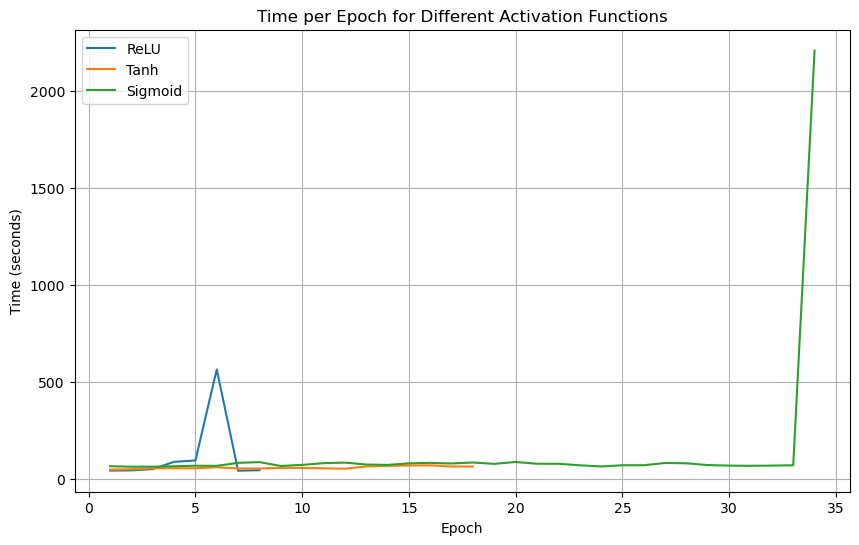

Training with ReLU Activation

In [30]:
relu_model = CNN_CIFAR10(nn.ReLU()).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(relu_model.parameters(), lr=0.001)


In [31]:
training_error = 100.0
epoch = 0
relu_epoch_times = []
relu_epoch_errors = []

while training_error > 45.0:
    epoch += 1
    start_time = time.time()

    correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = relu_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    training_error = 100 - (100 * correct / total)
    epoch_time = time.time() - start_time
    relu_epoch_times.append(epoch_time)
    relu_epoch_errors.append(training_error)

    print(f'ReLU - Epoch {epoch}: Training Error = {training_error:.2f}%, Time = {epoch_time:.2f}s')


ReLU - Epoch 1: Training Error = 62.03%, Time = 73.70s
ReLU - Epoch 2: Training Error = 50.93%, Time = 75.60s
ReLU - Epoch 3: Training Error = 45.39%, Time = 80.01s
ReLU - Epoch 4: Training Error = 42.05%, Time = 88.92s


Training with Tanh Activation

In [ ]:
tanh_model = CNN_CIFAR10(nn.Tanh()).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(tanh_model.parameters(), lr=0.001)


In [ ]:
training_error = 100.0
epoch = 0
tanh_epoch_times = []
tanh_epoch_errors = []

while training_error > 45.0:
    epoch += 1
    start_time = time.time()

    correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = tanh_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    training_error = 100 - (100 * correct / total)
    epoch_time = time.time() - start_time
    tanh_epoch_times.append(epoch_time)
    tanh_epoch_errors.append(training_error)

    print(f'Tanh - Epoch {epoch}: Training Error = {training_error:.2f}%, Time = {epoch_time:.2f}s')


Training with Sigmoid Activation

In [ ]:
sigmoid_model = CNN_CIFAR10(nn.Sigmoid()).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(sigmoid_model.parameters(), lr=0.001)


In [ ]:
training_error = 100.0
epoch = 0
sigmoid_epoch_times = []
sigmoid_epoch_errors = []

while training_error > 45.0:
    epoch += 1
    start_time = time.time()

    correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = sigmoid_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    training_error = 100 - (100 * correct / total)
    epoch_time = time.time() - start_time
    sigmoid_epoch_times.append(epoch_time)
    sigmoid_epoch_errors.append(training_error)

    print(f'Sigmoid - Epoch {epoch}: Training Error = {training_error:.2f}%, Time = {epoch_time:.2f}s')


Plot

In [ ]:
# Step 6: Plot epoch times and training errors for all activation functions
plt.figure(figsize=(12, 6))

# Plot training error vs epoch
plt.subplot(1, 2, 1)
for activation_name, errors in epoch_errors.items():
    plt.plot(range(1, len(errors) + 1), errors, label=activation_name)

plt.xlabel('Epoch')
plt.ylabel('Training Error (%)')
plt.title('Training Error vs Epoch')
plt.legend()
plt.grid()

# Plot time vs epoch
plt.subplot(1, 2, 2)
for activation_name, times in epoch_times.items():
    plt.plot(range(1, len(times) + 1), times, label=activation_name)

plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.title('Time per Epoch')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
def plot_results(activation_name, epoch_errors, epoch_times):
    epochs = range(1, len(epoch_errors) + 1)

    fig, ax1 = plt.subplots()

    # Plot Training Error
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Training Error (%)', color='tab:red')
    ax1.plot(epochs, epoch_errors, 'r-', label="Training Error")
    ax1.tick_params(axis='y', labelcolor='tab:red')

    # Create second y-axis for time
    ax2 = ax1.twinx()
    ax2.set_ylabel('Time per Epoch (s)', color='tab:blue')
    ax2.plot(epochs, epoch_times, 'b-', label="Time per Epoch")
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    fig.suptitle(f"Training Error & Time per Epoch for {activation_name}")
    fig.tight_layout()
    plt.show()